# Project: Rozsa's Customer's Data Analytics
## Author - Team 4
## Version - v1.1
## Platform - macOS 11.13.1 & Linux Ubuntu 17.04 LTS
## SDK - Python 3.6 with anaconda distribution (Some open source libraries)

### Hello! 
### In this analytical report We are presenting the scenario of data analytics on historical data of Rozsa perfromance.
### The Dataset was provided by ticketing manager based upon historical data availability. 
### The dataset is restrcited to use by Michigan Tech trusted persons. It contains private information so publication usage should strictly be avoided. Don't circulate this report to anyone.

## Data Science Project
### - Defination : Analyse Historical Ticketing data for Rozsa center. 
### - Objective : Give recommendation to the Rozsa based on facts & figures by using appropriate and valid data analytics & visualisations.
### - Deliverables : Working Predictive model for making accurate predictions.

### Library Imports & Declarations

In [1]:
#let's do some important task to ignore warning.
import pandas as pd #for loading data into dataframe
import seaborn as sns
sns.set(color_codes=True)
import plotly 
plotly.tools.set_credentials_file(username='dnisarg13', api_key='uuOflFYpaluNAifTb8rk')
import pandas as pd
import plotly.graph_objs as go
import plotly.plotly as py
from plotly.graph_objs import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 1. Data Wrangling - Collecting & organizing the data

## Grabbing Data From the Excel Sheet

In [2]:
rozsa_customer_data = pd.read_csv('Rozsa Customer data.csv')

### Examinign Data Rows and Columns 

In [3]:
print("The number of Rows and Columns in the Dataset is displayed below")
#showing number of Rows
print("Total Number of rows in Rozsa Customer data of September 2015:", rozsa_customer_data.shape[0])
#showing number of columns
print ("Total Number of columns in Rozsa Customer data of September 2015: ", rozsa_customer_data.shape[1])

The number of Rows and Columns in the Dataset is displayed below
Total Number of rows in Rozsa Customer data of September 2015: 20719
Total Number of columns in Rozsa Customer data of September 2015:  7


### Let's look at number of features or columns of dataset

In [4]:
#displaying columns and rows to understand the attributes.
print(rozsa_customer_data.columns)

Index(['Cust. #', 'Street', 'City', 'Zip', 'Perf. Description', 'Email',
       '# of Tix Purchased'],
      dtype='object')


### As we can see here the most important features are,
### - Customer number
### - City
### - Performance description
### - number of tickets purchased
### So Let's keep those features only
## The sensitive information fields are email ID & Street so let's remove them from our data for preserving customers privacy, Let's drop those columns

In [5]:
rozsa_customer_data.drop(rozsa_customer_data.columns[[1, 3, 5]], axis=1,inplace=True) 

### Data Understanding
### 1. Looking the top n rows (from head)

In [6]:
def top_head(n):
    return rozsa_customer_data.head(n)
top_head(5)

,Cust. #,City,Perf. Description,# of Tix Purchased
0,597,Chassell,1863-2013: Lincoln and Gettysburg,2
1,1569,Houghton,1863-2013: Lincoln and Gettysburg,2
2,1576,Hancock,1863-2013: Lincoln and Gettysburg,3
3,1679,Houghton,1863-2013: Lincoln and Gettysburg,2
4,1729,Hancock,1863-2013: Lincoln and Gettysburg,2


### 1. Looking the bottom n rows (from tail)

In [7]:
def top_tail(n):
    return rozsa_customer_data.tail(n)
top_tail(5)

,Cust. #,City,Perf. Description,# of Tix Purchased
20714,60105,Traverse City,Winter Carnival Comedians - College Humor LIVE,3
20715,60111,Houghton,Winter Carnival Comedians - College Humor LIVE,1
20716,60118,Houghton,Winter Carnival Comedians - College Humor LIVE,2
20717,60120,Houghton,Winter Carnival Comedians - College Humor LIVE,1
20718,60121,Hancock,Winter Carnival Comedians - College Humor LIVE,2


## Extracting insights from Cities

### Grouping Data by Cities! It will group the all the rows from same cities

In [8]:
City_and_ticket = rozsa_customer_data.groupby('City').sum()
City_and_ticket.drop(City_and_ticket.columns[[0]], axis=1,inplace=True)

In [9]:
City_and_ticket_sorted = City_and_ticket.sort_values('# of Tix Purchased',ascending=False)

### Function for finding "the City from which the most ticket is bought"
###  -  This function find the Top n cities from which most of the tickets bought by customers
###  -  This Output will indicate the  City names in which Rozsa has its largest consumerbase  

In [10]:
def top_cities_ticketbuyers(n):
    return City_and_ticket_sorted.head(n)

### Finding top 25 Cities which has lagest cosumer segment
### You can find top 1,2,3...n cities by just changing the N in the function.

In [11]:
top_cities_ticketbuyers(50)

,# of Tix Purchased
City,
Houghton,28503
Hancock,9031
Chassell,3830
Calumet,2589
South Range,1638
Dollar Bay,1405
Atlantic Mine,1255
Lake Linden,1212
Marquette,1144


### Finding the cities which has least ticket share
### Again you can put 1,2...n number for finding n least important cities

In [12]:
def least_cities_ticketbuyers(n):
    return City_and_ticket_sorted.tail(n)

In [13]:
least_cities_ticketbuyers(25)

,# of Tix Purchased
City,
STandish,1
Charlevoix,1
Chesterton,1
Zionsville,1
Chisholm,1
Nacogdoches,1
Wyoming,1
Clyde,1
Wixom,1


## Who's Rozsa's frequent customer?

## Now Let's find most frequent customer
### Grouping Data by Customers! It will group the all the rows from Frequent Customers

In [14]:
duplicate = rozsa_customer_data.copy()
duplicate = duplicate.rename(columns={'Cust. #': 'CustID', '# of Tix Purchased': 'Frequency of Audience'})
duplicate = duplicate.drop(['City', 'Perf. Description'],axis=1)

In [15]:
Customer_and_ticket1 = duplicate['Frequency of Audience'].groupby(duplicate['CustID']).count()
most_frequent_coustomer = Customer_and_ticket1.sort_values(ascending=False)

In [16]:
def top_most_frequent_audience(n):
    return most_frequent_coustomer.head(n)

### Function to find the most frequent customers, who buys the tickets the most frequently.
### You can see your 1..n most frequent customers ID using this function & adjusting result values.

In [17]:
top_most_frequent_audience(25)

CustID
23228    138
27118    131
1830     125
1569     113
23374     89
31632     88
29775     81
597       66
1679      64
26449     60
28816     60
34289     57
14299     54
23253     54
46069     52
1781      51
29772     49
23391     48
9708      48
23383     47
1729      46
28690     43
21204     42
16791     41
8062      39
Name: Frequency of Audience, dtype: int64

## Wanna Know most popular Performance?

## Describing user base on Performance Vs ticket buying behavior
### We can analyze that which performance is most important and popular among the user base.

In [18]:
Performance_and_ticket = rozsa_customer_data.groupby('Perf. Description').sum()
Performance_and_ticket.drop(Performance_and_ticket.columns[[0]], axis=1,inplace=True)
Performance_and_ticket_sorted = Performance_and_ticket.sort_values('# of Tix Purchased',ascending=False)

In [19]:
def top_valuable_performance(n):
    return Performance_and_ticket_sorted.head(n)

## Listing the most Famous performances at Rozsa! Again just mention the number and you can view the top 10 performances.

In [20]:
top_valuable_performance(50)

,# of Tix Purchased
Perf. Description,
Class Acts - Rainforest Reptile Show,2721
Pirate School! The Science of Pirates,2174
Class Acts - Very Hungry Catepillar,1853
Class Acts - We're Going on a Bear Hunt,1746
"Minnesota Ballet, with the KSO; The Nutcracker",1710
Copper Dog for Kids,1624
Swan Lake,1347
Class Acts: Peter Rabbit,1346
Fiddler on the Roof,1337


In [21]:
def least_valuable_performance(n):
    return Performance_and_ticket_sorted.tail(n)

## Identify the least popular performances at Rozsa!
### Again you can scale this anlysis upto 1...n

In [22]:
least_valuable_performance(50)

,# of Tix Purchased
Perf. Description,
Songs of the Earth,117
Helsinki Chamber Choir: State of the Union,113
II:Day into Night:II,110
Orchid Ensemble and conScience,105
Antigone,98
Suites!,96
Sexual Perversity in Chicago,95
Mandy Gonzales,92
4th Keweenaw Honors String Festival,90


# Exploratory Data Analysis

## Distribution of Most Frequent Customers

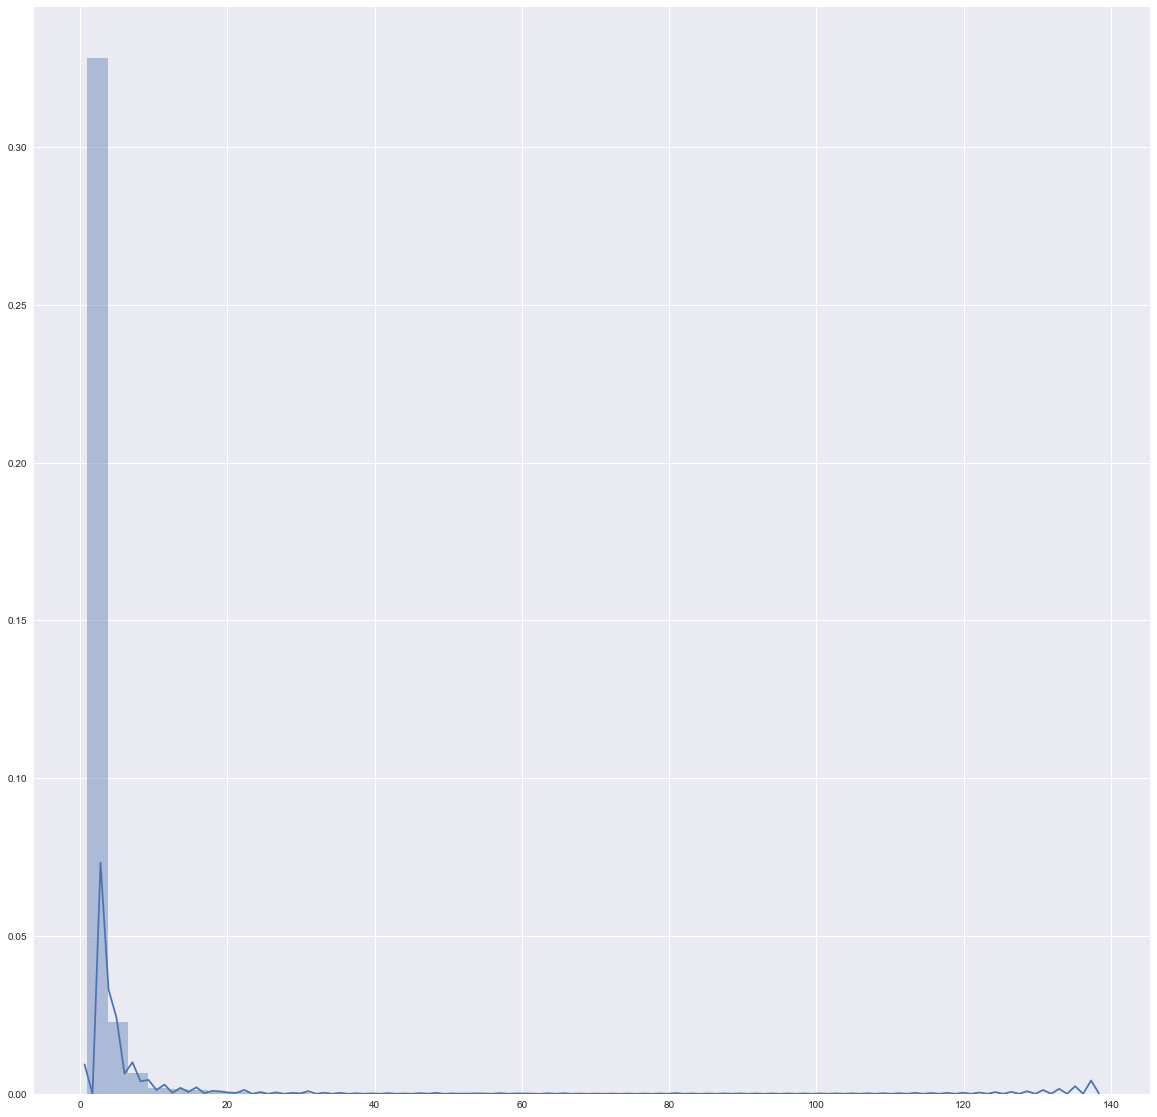

In [23]:
plt.figure(figsize=(20, 20))
sns.distplot(most_frequent_coustomer.values);

### Clearly here the data points distribution is positively skewed and Right skewed. Generally here mean is greater than median 
### This situation probes serious questions to Rozsa's User's behavior,
###  -  Users are more uncertain/ambiguous about behavior
###  -  Some users tend to buy tickets more and more frequently.
###  -  Some of them barely buys tickets at certain intervals.
###  -  Data creates more mean due to high frequency of ticket buying behaviour of some users.
### More insights can be drawn from following chart

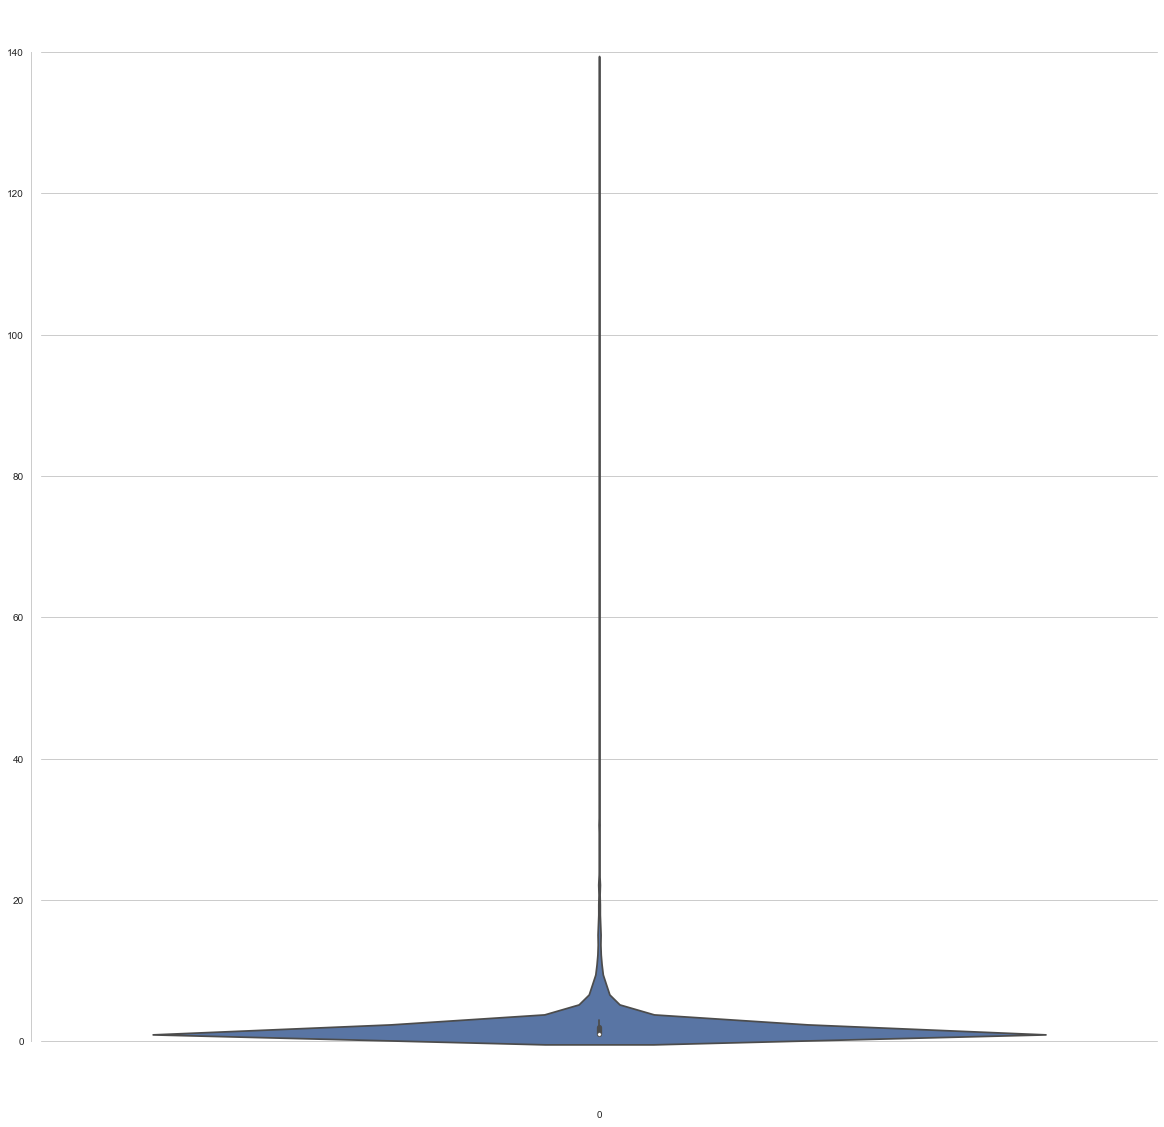

In [24]:
plt.figure(figsize=(20, 20))
sns.set_style("whitegrid")
sns.violinplot(data=most_frequent_coustomer.values)
sns.despine(offset=10, trim=True);

KeyboardInterrupt: 

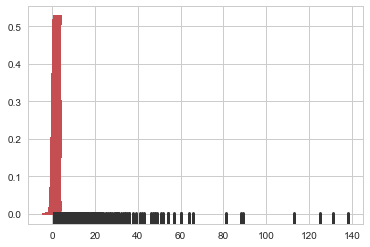

In [25]:
from scipy import stats
x = most_frequent_coustomer.values
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

## Let's Understand User behaviour in depth.

### We've created Heat Map for understanding it graphically.
### -  Total tickets are the intensity of colors in Heat Map.
### -  X axis is City & Y axis is Perf. Description

In [43]:
plt.figure(figsize=(12, 14))
trace = go.Heatmap(z=rozsa_customer_data['# of Tix Purchased'],
                   x=rozsa_customer_data['City'],
                   y=rozsa_customer_data['Perf. Description'])
data=[trace]
py.iplot(data, filename='labelled-heatmap1')

## Results shows that, 
##  -  Heat Map is more dense in starting
##  -  After going far on X axis points are scattered at certain distance & this distance increases exponentially.
##  -  This is interactive chart & you alse can Zoom In for finding more instances clearly.
##  -  You can locate x,y,z values by hovering mouse on perticular point and so each and every record is being mapped into heat map.

## Graph for City Vs Total Sales of Ticket

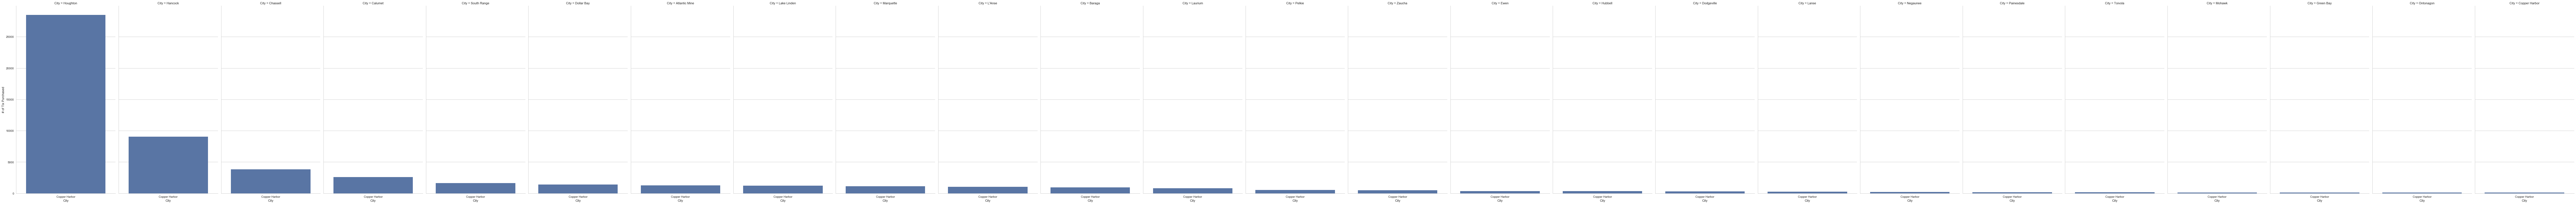

In [27]:
cities_graph = pd.read_excel('city.xlsx')
g = sns.FacetGrid(cities_graph, col="City", size=10, aspect=.5)
g.map(sns.barplot, "City", "# of Tix Purchased");

## Graph for the Performance VS ticket sales

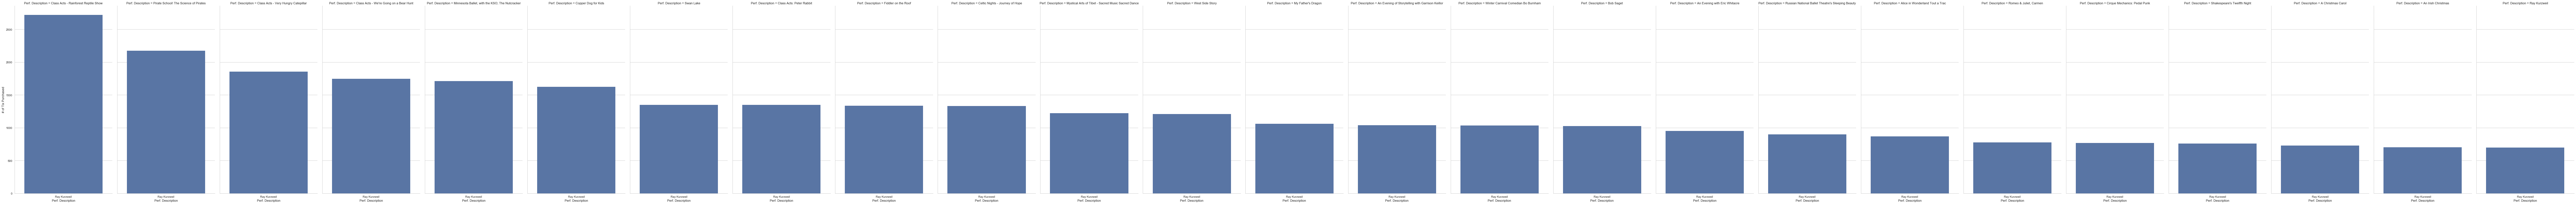

In [28]:
performance_graph = pd.read_excel('performance.xlsx')
g1 = sns.FacetGrid(performance_graph, col="Perf. Description", size=10, aspect=.5)
g1.map(sns.barplot, "Perf. Description", "# of Tix Purchased");

# Predictive Modelling
##  -  In this section I've created one AI Technology. The statistical model which predicts the liking of users.
##  -  We've used City, Cust ID & Perf. Description features for predicting whether the customer will buy the ticket or not! 

In [29]:
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error
import random

/Users/ambrose/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.

/Users/ambrose/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.



## Code for optimizing our mathematical model for better accuracy

In [30]:
#optimizing our model
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None, verbose=0):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func, verbose=verbose)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds, verbose=verbose)
    gs.fit(X, y)
    print("BEST", gs.best_params_, gs.best_score_, gs.grid_scores_, gs.scorer_)
    print("Best score: ", gs.best_score_)
    best = gs.best_estimator_
    return best

## Training & testing of our Machine learning model

In [31]:
data = rozsa_customer_data.copy()
#getting train & test set
train_set, test_set = train_test_split(range(data.shape[0]), train_size=0.8)
mask=np.ones(data.shape[0], dtype='int')
mask[train_set]=1
mask[test_set]=0
mask = (mask==1)
mask[:10]

array([False, False,  True,  True,  True,  True,  True,  True,  True, False], dtype=bool)

## Predictor features,
### We're using Cust #, City, Pef. Description to predict whether customer will buy next show ticket or not?

In [32]:
# Split off the features
Xnames = ['Cust. #','City','Perf. Description']
#'VendorID', 'Store_and_fwd_flag','RateCodeID','Passenger_count','Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax','Tolls_amount', 'improvement_surcharge','Payment_type', 'Trip_type ', 'Week', 'Week_day', 'Month_day', 'Hour', 'Shift_type','Trip_duration', 'Direction_NS', 'Direction_EW', 'Speed_mph','upper_manhattan', 'Pickup_hour','With_tip' ,'Total_amount','Tip_percentage','Tip_amount'
#Xnames = ['Total_amount','Tip_amount']
X = data[Xnames]
y = np.log10(data['# of Tix Purchased']+1)

## Splitting off original dataset as in train and test dataset for performing training & testing of our model

In [33]:
Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
n_samples = Xtrain.shape[0]
n_features = Xtrain.shape[1]
print(Xtrain.shape)
max_samples = 1000000
if Xtrain.shape[0] > max_samples:
    rows = random.sample(list(Xtrain.index),max_samples)
    Xtrain = Xtrain.ix[rows]
    ytrain = ytrain.ix[rows]
    
print (Xtrain.shape)

(16575, 3)
(16575, 3)


### Estimating feature Vectors

In [34]:
estimator = RandomForestRegressor(n_estimators=20, n_jobs=-1)

In [35]:
#defining the parameters
Xtrain = Xtrain.apply(pd.to_numeric, errors='coerce')
ytrain = ytrain.apply(pd.to_numeric, errors='coerce')
Xtrain = Xtrain.as_matrix().astype(np.float64)
ytrain = ytrain.as_matrix().astype(np.float64)
Xtrain[np.isnan(Xtrain)]=0
ytrain[np.isnan(ytrain)]=0

In [36]:
parameters = {"n_estimators": [50],
              "max_features": ["auto"],
              "max_depth": [50]}
best = cv_optimize(estimator, parameters, Xtrain, ytrain, n_folds=5, score_func='mean_squared_error', verbose=3)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=50, max_features=auto, n_estimators=50 ................


/Users/ambrose/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  max_depth=50, max_features=auto, n_estimators=50, score=-0.042327 -   0.9s
[CV] max_depth=50, max_features=auto, n_estimators=50 ................


/Users/ambrose/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV]  max_depth=50, max_features=auto, n_estimators=50, score=-0.057755 -   1.0s
[CV] max_depth=50, max_features=auto, n_estimators=50 ................


/Users/ambrose/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.



[CV]  max_depth=50, max_features=auto, n_estimators=50, score=-0.030788 -   0.8s
[CV] max_depth=50, max_features=auto, n_estimators=50 ................


/Users/ambrose/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.



[CV]  max_depth=50, max_features=auto, n_estimators=50, score=-0.035832 -   0.8s
[CV] max_depth=50, max_features=auto, n_estimators=50 ................


/Users/ambrose/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.3s finished


[CV]  max_depth=50, max_features=auto, n_estimators=50, score=-0.037162 -   0.8s
BEST {'max_depth': 50, 'max_features': 'auto', 'n_estimators': 50} -0.04077302158538728 [mean: -0.04077, std: 0.00925, params: {'max_depth': 50, 'max_features': 'auto', 'n_estimators': 50}] make_scorer(mean_squared_error, greater_is_better=False)
Best score:  -0.04077302158538728


In [37]:
Xtest = Xtest.apply(pd.to_numeric, errors='coerce')
ytest = ytest.apply(pd.to_numeric, errors='coerce')
Xtest = Xtest.as_matrix().astype(np.float64)
ytest = ytest.as_matrix().astype(np.float64)
Xtest[np.isnan(Xtest)]=0
ytest[np.isnan(ytest)]=0

In [38]:
reg=best.fit(Xtrain, ytrain)
training_accuracy = reg.score(Xtrain, ytrain)
test_accuracy = reg.score(Xtest, ytest)
print ("############# based on standard predict ################")
print ("R^2 on training data: %0.4f" % (training_accuracy))
print ("R^2 on test data:     %0.4f" % (test_accuracy))

############# based on standard predict ################
R^2 on training data: 0.7538
R^2 on test data:     0.3105


### Finding Prediction error.
### From Observation, The error of our model is less and so it's presentable model

In [39]:
rmse = np.sqrt(mean_squared_error(reg.predict(Xtest),ytest))
print ("RMSE = %0.3f (this is in log-space!)" % rmse)
print ("So two thirds of the records would be a factor of less than %0.2f away from the real value." % np.power(10,rmse))

RMSE = 0.186 (this is in log-space!)
So two thirds of the records would be a factor of less than 1.53 away from the real value.


### Predicting from the new test set for final validation for our Predictive Model

In [40]:
test = pd.read_csv('test.csv')
test = test.apply(pd.to_numeric, errors='coerce')
test = test.as_matrix().astype(np.float64)
test[np.isnan(test)]=0
result = np.power(10,reg.predict(test))
buys = []
def whether_buys(result):
    for i in range(len(result)):
        buys.append(result.mean() - 0.2 < result[i] < result.mean() + 0.2)
    return buys
prediction_array = whether_buys(result)

## Placing our Predictions into Presentable way

In [41]:
prediction_result = pd.read_csv('test.csv')
prediction_result['Will Buy?'] = pd.DataFrame(prediction_array)
prediction_result.head()

,Cust. #,City,Perf. Description,Will Buy?
0,597,Chassell,1863-2013: Lincoln and Gettysburg,True
1,1569,Houghton,1863-2013: Lincoln and Gettysburg,True
2,1576,Hancock,1863-2013: Lincoln and Gettysburg,True
3,1679,Houghton,1863-2013: Lincoln and Gettysburg,True
4,1729,Hancock,1863-2013: Lincoln and Gettysburg,True


# Conclusion:
## This Report contains all data science project lifecycle from Data munging to making predictions.
### We've used all of them and made one Predictive Model as a final outcome,
###    - We've made recommendations for Rozsa by predicting outcomes.
###    - We've done Exploratory Data analysis for ease of judging data.
###    - We've used advanced visualisation for understanding user behaviours in a better way.
###    - We've used comments, markdowns & even long descriptions for making this report more interpretable.
###    - Any kind of suggestions, recommendations & personal comments are higly appreciated.

#  Thank you!